In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy import stats 
import seaborn as sns
import os
import networkx as nx

In [50]:
def weightedVG(serie):
    G=nx.DiGraph()
    for Na in range (len(serie)):
        ya=serie[Na]
        maxslp=-1000
        for Nb in range(Na+1,len(serie)):
#             print(Na,Nb,Na-Nb)
            yb=serie[Nb]
            slp=(yb-ya)/(Nb-Na)
            if slp > maxslp:
                G.add_edge(Na,Nb,w=np.round(slp,3))
                maxslp=slp
                
    
    for i in range(len(serie)):
        G.add_node(i, y=serie[i])
                            
    
    return(G)

In [75]:
serie = np.random.randint(1,10,1000)

In [52]:
gg = weightedVG(serie)

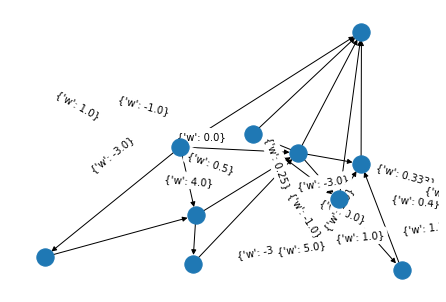

In [53]:
nx.draw(gg)
nx.draw_networkx_edge_labels(gg ,  pos=nx.spring_layout(gg));

In [76]:
G = weightedVG(serie)

elarge = [(u, v) for (u, v, d) in G.edges(data=True) if d['w'] > 0.5]
esmall = [(u, v) for (u, v, d) in G.edges(data=True) if d['w'] <= 0.5]

KeyboardInterrupt: 

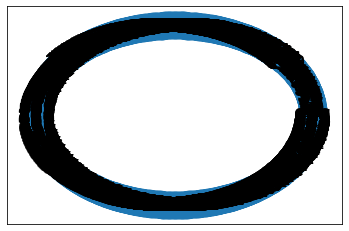

In [77]:
pos = nx.circular_layout(G)  # positions for all nodes

# nodes
nx.draw_networkx_nodes(G, pos, node_size=700)

# edges
nx.draw_networkx_edges(G, pos, edgelist=elarge,
                       width=6)
nx.draw_networkx_edges(G, pos, edgelist=esmall,
                       width=6, alpha=0.5, edge_color='b', style='dashed')

# labels
nx.draw_networkx_labels(G, pos, font_size=20, font_family='sans-serif')
nx.draw_networkx_edge_labels(G ,  pos);
plt.axis('off')
plt.show()

In [79]:
edg = list(G.edges(data = True))
ws = [weight[2]['w'] for weight in edg]

(array([ 31.,  93.,  76., 281., 548., 893., 273.,  77.,  87.,  37.]),
 array([-8. , -6.4, -4.8, -3.2, -1.6,  0. ,  1.6,  3.2,  4.8,  6.4,  8. ]),
 <a list of 10 Patch objects>)

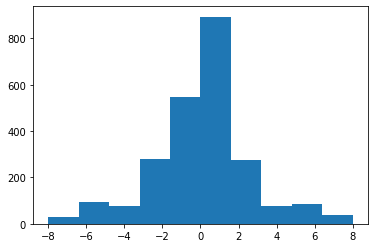

In [80]:
plt.hist(ws)